Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import seaborn as sns
from IPython.display import display
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mutual_info_score
import warnings
warnings.filterwarnings('ignore')

Load Dataset

In [2]:
data = pd.read_csv("C:/Users/Godwin/Documents/Workflow/ML Zoomcamp/Classification/Customer-churn/Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


String Formatting

In [3]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

categorical_col = data.dtypes[data.dtypes == 'object'].index.tolist()

for col in categorical_col:
    data[col] = data[col].str.replace(' ', '_').str.lower()

In [4]:
data.head()

EDA

In [5]:
#Checking Data infomation
data.info()

In [6]:
#Checking for null values
data.isnull().sum()

In [7]:
data.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
#Changing totalcharges column to float
#data['totalcharges'] = data['totalcharges'].astype('float')

In [9]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors= 'coerce')

In [10]:
data.info()

In [11]:
#Checking number of unique values in each column
data.nunique()

In [12]:
data.isnull().sum()

In [13]:
#Filling null values
data['totalcharges'].fillna(data['totalcharges'].mean(), inplace = True)

In [14]:
#Visualization 

def displayBarValues(chartName,ty=""):
    for p in chartName.patches:
        bar_height = p.get_height() if not pd.isnull(p.get_height()) else 0
        bar_width = p.get_width() if not pd.isnull(p.get_width()) else 0
        bar_x = p.get_x() if not pd.isnull(p.get_x()) else 0
        if(ty=="per"):
            chartName.text(bar_x + (bar_width / 2.5),
                bar_height +0.9,(str)(round(bar_height,1))+"%" or '', color='black', ha="center")
        else:
            chartName.text(bar_x + (bar_width / 2.0),
                bar_height +0.9,(round(bar_height,1)) or '', color='black', ha="center")

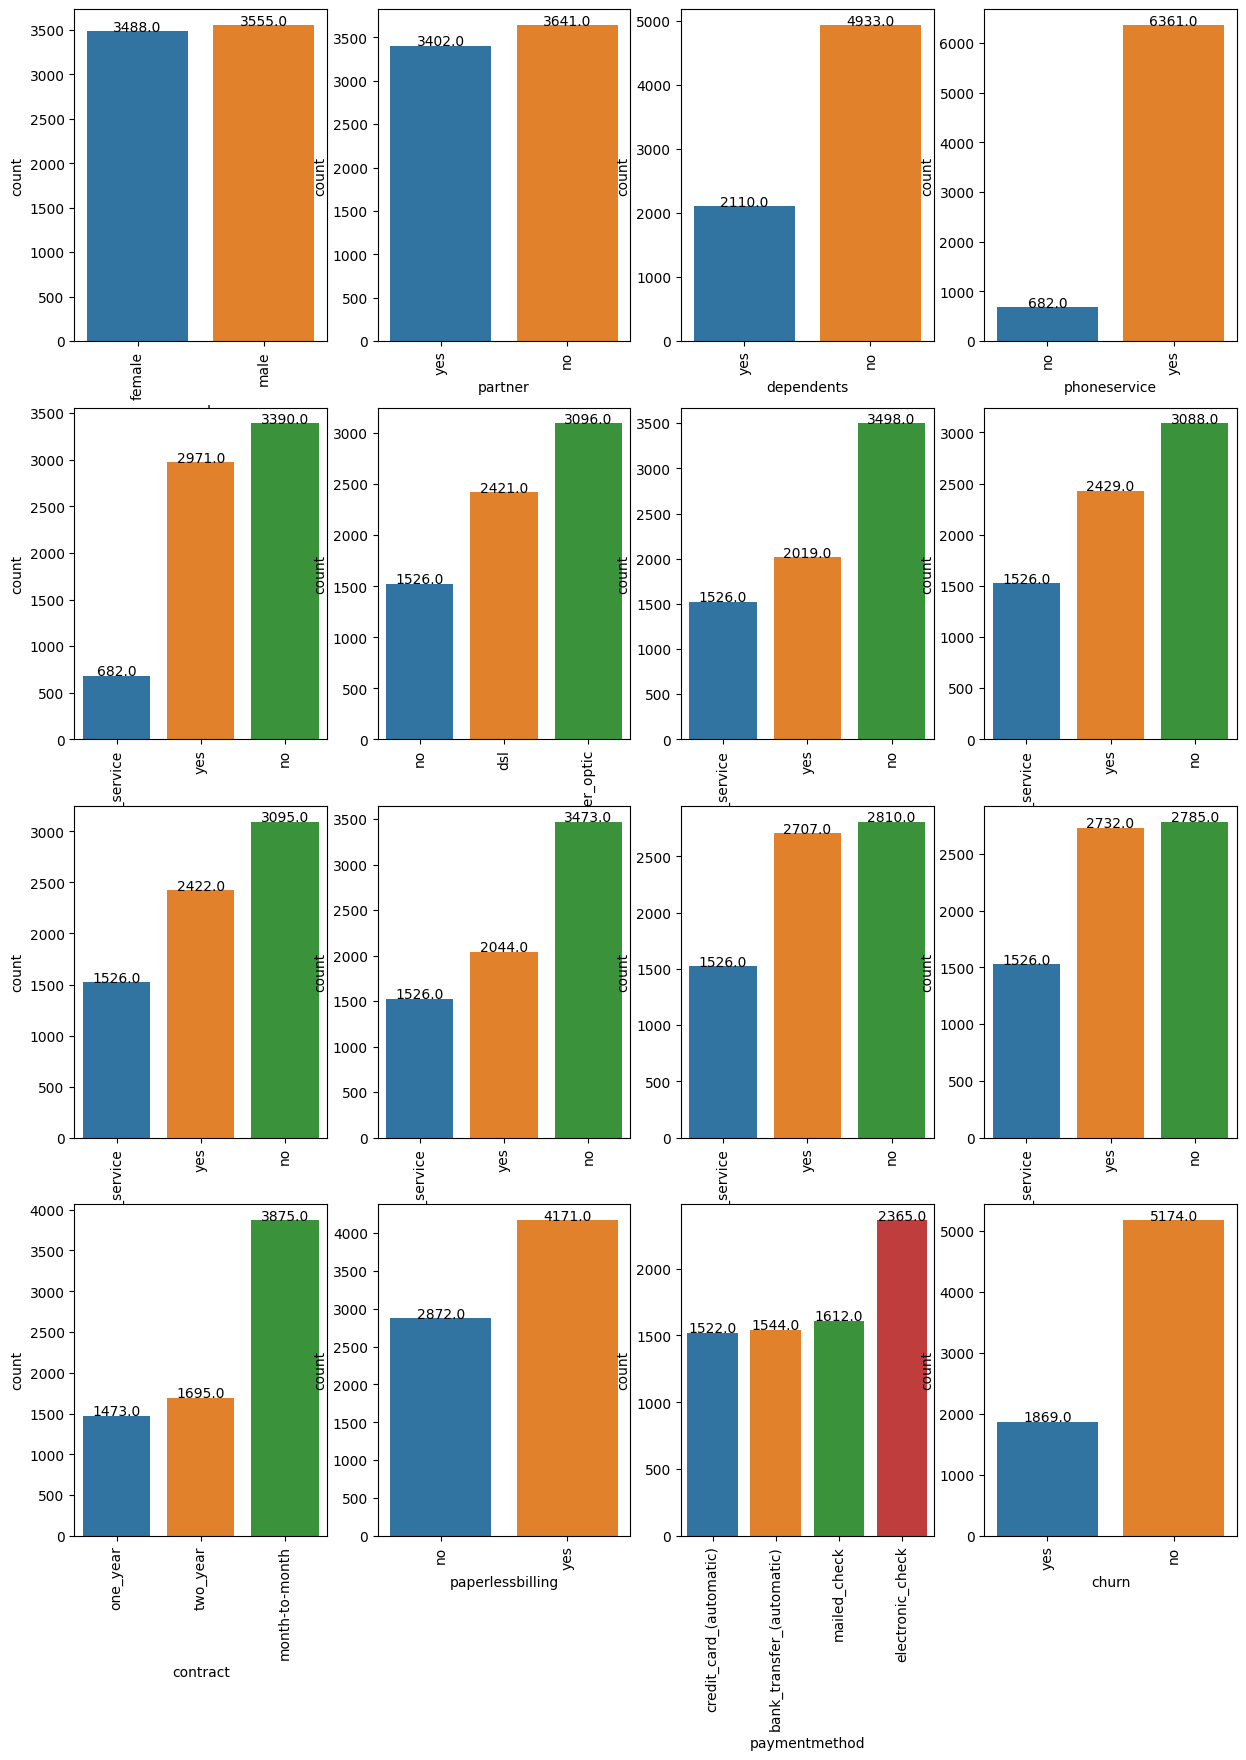

In [15]:
categorical_col = data.dtypes[data.dtypes == 'object'].index.tolist()
numerical_col = ['tenure', 'totalcharges', 'monthlycharges']

categorical_col.remove('customerid')
plt.figure(figsize = (15,25))
rows = int(len(categorical_col)/4 +1)
for i,col in enumerate(categorical_col):

    plt.subplot(rows, 4, i+1)
    chart = sns.countplot(x = col, data = data, order = data[col].value_counts(normalize=True).sort_values().index)
    displayBarValues(chart)
    plt.xticks(rotation = 90)

In [16]:
#Percentage of churning to not churning
(data['churn'].value_counts(normalize=True)*100).sort_values()

yes    26.536987
no     73.463013
Name: churn, dtype: float64

In [17]:
#Covert churn column to integer
data['churn'] = (data.churn=='yes').astype(int)


#Checking churning rate in relation to other columns
global_churn_rate = data['churn'].mean()
print('The churning rate of the company is ',global_churn_rate)

female_churn = data[data['gender'] == 'female']['churn'].mean()
print('The churning rate of females in the company is ', female_churn)
male_churn = data[data['gender'] == 'male']['churn'].mean()
print('The churning rate of males in the company is ',male_churn)

The churning rate of the company is  0.2653698707936959
The churning rate of females in the company is  0.26920871559633025
The churning rate of males in the company is  0.2616033755274262


Relationship between columns and the churning rate

In [18]:
# for i in categorical_col:
#     data_group = data.groupby(i)['churn'].agg(['mean'])
#     data_group['difference'] = data_group['mean'] - global_churn_rate
#     data_group['risk'] = data_group['mean']/ global_churn_rate
#     display(data_group)
#     print()
#     print()

In [19]:
#Relationship between numerical columns and the target variable
data[numerical_col].corrwith(data['churn'])

tenure           -0.352229
totalcharges     -0.199428
monthlycharges    0.193356
dtype: float64

In [20]:
#Binnning columns to extract information

data['tenure_bins'] = pd.cut(x = data['tenure'], bins = [0, 30, 60, 90], labels = ['0 - 30', '31 - 60', '61 - 90'])

data['monthly_bins'] = pd.cut(x = data['monthlycharges'], bins = [0, 50, 100, 150], labels = ['0 - 50', '51 - 100', '101 - 150'])

In [21]:
data.groupby(['tenure_bins'])['churn'].agg('mean')

tenure_bins
0 - 30     0.392562
31 - 60    0.175940
61 - 90    0.066098
Name: churn, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, '61 - 90'), Text(1, 0, '31 - 60'), Text(2, 0, '0 - 30')])

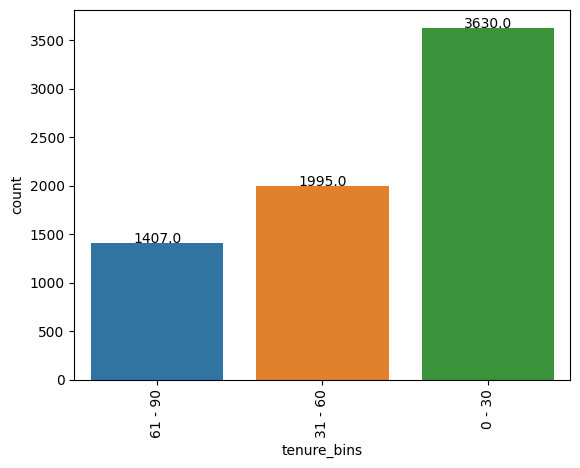

In [22]:
chart = sns.countplot(x = 'tenure_bins', data = data, order = data['tenure_bins'].value_counts(normalize=True).sort_values().index)
displayBarValues(chart)
plt.xticks(rotation = 90)

In [23]:
data.groupby(['monthly_bins'])['churn'].agg('mean')

monthly_bins
0 - 50       0.157025
51 - 100     0.326653
101 - 150    0.280488
Name: churn, dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, '101 - 150'), Text(1, 0, '0 - 50'), Text(2, 0, '51 - 100')])

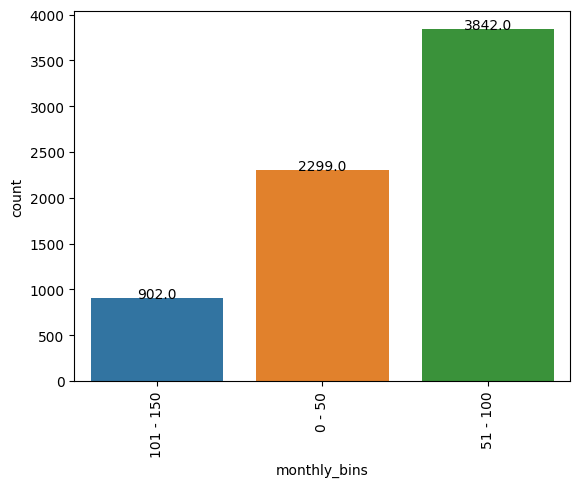

In [24]:
chart = sns.countplot(x = 'monthly_bins', data = data, order = data['monthly_bins'].value_counts(normalize=True).sort_values().index)
displayBarValues(chart)
plt.xticks(rotation = 90)

In [25]:
data.drop(['tenure_bins', 'monthly_bins'], axis = 1, inplace = True)

In [26]:
#Function for mutual information between features and target
def mutual_info(series):
    return mutual_info_score(series, data['churn'])

mi = data[categorical_col].apply(mutual_info)
mi.sort_values(ascending = False)

churn               0.578599
contract            0.098453
onlinesecurity      0.064677
techsupport         0.063021
internetservice     0.055574
onlinebackup        0.046792
paymentmethod       0.044519
deviceprotection    0.043917
streamingmovies     0.032001
streamingtv         0.031908
paperlessbilling    0.019194
dependents          0.014467
partner             0.011454
multiplelines       0.000801
phoneservice        0.000072
gender              0.000037
dtype: float64

In [27]:
#Spliting the data
train_df, test_df = train_test_split(data, test_size = 0.2, random_state=1)
train_df, val_df = train_test_split(train_df, test_size = 0.25, random_state=1)

y_train = train_df.pop('churn')
y_test = test_df.pop('churn')
y_val = val_df.pop('churn')

In [28]:
#Encoding the data with DictVectorizer
dv = DictVectorizer(sparse = False)

categorical_col.remove('churn')
dv.fit(train_df[categorical_col + numerical_col].to_dict(orient = 'records'))
X_train = dv.transform(train_df[categorical_col + numerical_col].to_dict(orient = 'records'))
X_test =  dv.transform(test_df[categorical_col + numerical_col].to_dict(orient = 'records'))
X_val =  dv.transform(val_df[categorical_col + numerical_col].to_dict(orient = 'records'))

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [30]:
#Model Weight
model.coef_[0].round(3)

array([ 0.495, -0.183, -0.424, -0.009, -0.103,  0.062, -0.092, -0.083,
       -0.037, -0.075, -0.346,  0.326, -0.092,  0.004, -0.263,  0.142,
        0.009,  0.063, -0.092, -0.083,  0.269, -0.092, -0.29 , -0.233,
        0.122, -0.177,  0.065, -0.091, -0.036,  0.078, -0.063,  0.142,
       -0.254, -0.125, -0.092,  0.105, -0.071, -0.092,  0.051,  0.223,
       -0.092, -0.243, -0.068,  0.   ])

In [31]:
#Model Bias
model.intercept_.round(3)

array([-0.113])

In [32]:
#Model validation
prediction = model.predict_proba(X_val)[:,1]
churn_decision = (prediction >= 0.5)

print((y_val == churn_decision).mean())
churn_decision = churn_decision.astype('int')

0.7991483321504613


Training on full data

In [33]:
full_df = pd.concat([train_df, val_df])
label = pd.concat([y_train, y_val])

In [34]:
full = full_df[categorical_col + numerical_col].to_dict(orient = 'record')
new_df = dv.fit_transform(full)
model.fit(new_df, label)

LogisticRegression()

Making Prediction

In [35]:
prediction = model.predict_proba(X_test)[:, 1]
prediction = (prediction >= 0.5)
prediction = prediction.astype('int')
print('The accuracy of the model is ', (y_test == prediction).mean())
dictionary = {'Customerid': test_df['customerid'], "Actual": y_test, 'Predicted': prediction, "Match": y_test == prediction}
output = pd.DataFrame(dictionary)

The accuracy of the model is  0.8097941802696949


In [36]:
output.head(20)

,Customerid,Actual,Predicted,Match
3381,8879-zkjof,0,0,True
6180,0201-mibol,0,0,True
4829,1600-dilpe,0,0,True
3737,8601-qacrs,1,0,False
4249,7919-zodzz,0,0,True
6835,7964-zrkkg,0,0,True
3869,1357-bijki,0,0,True
3943,8720-rqsbj,0,0,True
3491,4682-blbuc,0,0,True
6847,8930-xotdp,0,0,True


In [37]:
output[output['Match'] == False]['Customerid'].shape

(268,)